In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings("ignore")


In [5]:
df=pd.read_csv('stud.csv')

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
X= df.drop(columns=['math_score'],axis=1)

In [8]:
y= df['math_score']

In [9]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()  
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", num_transformer, num_features),  
    
    ]
)


In [10]:
x = preprocessor.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [12]:
def evaluate_model(true,predicted):
    mae= mean_absolute_error(true,predicted)
    mse= mean_squared_error(true,predicted)
    rmse= np.sqrt(mse)
    r2_square= r2_score(true,predicted)
    return mae, mse, rmse, r2_square


In [13]:
models={
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "KNN": KNeighborsRegressor(),
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "SVR": SVR(),
    "XGB Regressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list =[]
r2_list =[]
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    # make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # evaluate model
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print("Model performance on Training set")
    print("root mean absolute error:{:.4f}".format(model_train_mae))
    print("root mean squared error:{:.4f}".format(model_train_rmse))
    print("R2 score:{:.4f}".format(model_train_r2))
    print("--------------------------------------------")

    print("Model performance on Test set")
    print("root mean absolute error:{:.4f}".format(model_test_mae))
    print("root mean squared error:{:.4f}".format(model_test_rmse))
    print("R2 score:{:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    print("="*35)
    print("\n")


Random Forest
Model performance on Training set
root mean absolute error:1.8191
root mean squared error:2.2735
R2 score:0.9771
--------------------------------------------
Model performance on Test set
root mean absolute error:4.6187
root mean squared error:5.9848
R2 score:0.8528


Decision Tree
Model performance on Training set
root mean absolute error:0.0187
root mean squared error:0.2795
R2 score:0.9997
--------------------------------------------
Model performance on Test set
root mean absolute error:6.2300
root mean squared error:7.8454
R2 score:0.7471


KNN
Model performance on Training set
root mean absolute error:4.5155
root mean squared error:5.7071
R2 score:0.8555
--------------------------------------------
Model performance on Test set
root mean absolute error:5.6240
root mean squared error:7.2546
R2 score:0.7837


Linear Regression
Model performance on Training set
root mean absolute error:4.2667
root mean squared error:5.3231
R2 score:0.8743
------------------------------

In [14]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2 Score']).sort_values(by='R2 Score',ascending=False)

,Model Name,R2 Score
4,Ridge,0.880593
3,Linear Regression,0.880433
0,Random Forest,0.852807
9,AdaBoost Regressor,0.852663
8,CatBoost Regressor,0.851632
7,XGB Regressor,0.827797
5,Lasso,0.825320
2,KNN,0.783722
1,Decision Tree,0.747060
6,SVR,0.728600


In [15]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f"%score)

Accuracy of the model is 88.04


Text(0, 0.5, 'Predicted Math Scores')

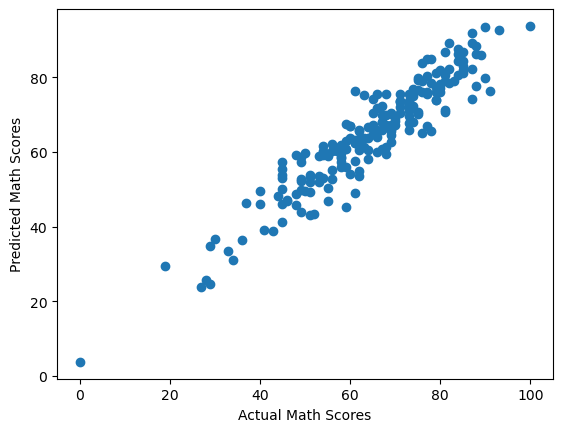

In [16]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")

<Axes: xlabel='math_score'>

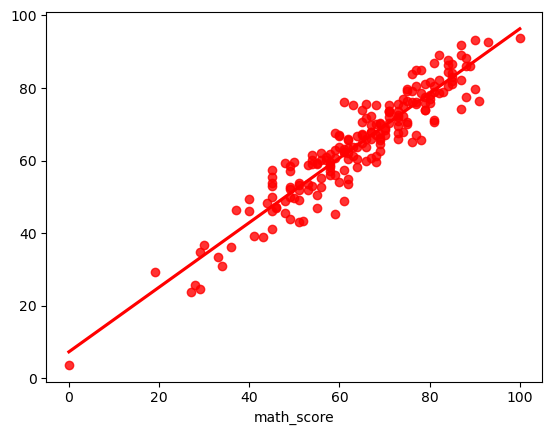

In [17]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [19]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
